**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep='\t')

In [4]:
data.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0


In [5]:
data.shape

(2240, 29)

# Data Preprocessing

In [6]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#Convert date Object to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

**Removing null values in income column**

In [10]:
data.dropna(subset=['Income'], inplace=True)

**feature engineering**

In [11]:
data['Dt_Customer'] =data['Dt_Customer'].astype('str')

In [12]:
newdate = '2023-01-01'
data['Customer_Days_Enrollment']=0
for i in data.index:
    data['Dt_Customer'][i]
    d1 = datetime.strptime(newdate, "%Y-%m-%d")
    d2 = datetime.strptime(data['Dt_Customer'][i], "%Y-%m-%d")
    delta = d1 - d2
    data["Customer_Days_Enrollment"][i]=delta.days
data['Customer_Days_Enrollment'] =data['Customer_Days_Enrollment'].astype('int')

In [13]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days_Enrollment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,3919
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,3073
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,3420


In [14]:
data["Age"] = 2023-data["Year_Birth"]

In [15]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days_Enrollment,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,3919,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,3073,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,3420,58


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2216 non-null   int64  
 1   Year_Birth                2216 non-null   int64  
 2   Education                 2216 non-null   object 
 3   Marital_Status            2216 non-null   object 
 4   Income                    2216 non-null   float64
 5   Kidhome                   2216 non-null   int64  
 6   Teenhome                  2216 non-null   int64  
 7   Dt_Customer               2216 non-null   object 
 8   Recency                   2216 non-null   int64  
 9   MntWines                  2216 non-null   int64  
 10  MntFruits                 2216 non-null   int64  
 11  MntMeatProducts           2216 non-null   int64  
 12  MntFishProducts           2216 non-null   int64  
 13  MntSweetProducts          2216 non-null   int64  
 14  MntGoldP

**spent on Products**

In [17]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

**Promotion**

In [18]:
data["NumDealsPurchases"].value_counts()

1     960
2     493
3     293
4     188
5      94
6      60
0      44
7      39
8      14
9       8
15      7
10      5
11      5
13      3
12      3
Name: NumDealsPurchases, dtype: int64

In [19]:
data["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

**changing Marital_Status to married and single**

In [20]:
data['RelationShip_status'] = data['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0})
data['RelationShip_status'] =data['RelationShip_status'].astype('int')

In [21]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days_Enrollment,Age,Spent,RelationShip_status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,3919,66,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,3073,69,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,3420,58,776,1


**combining the kidhome and teenhome as one column childern**

In [22]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [23]:
data["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

**change education categories to under graduates and post graduates**

In [24]:
data["Education"]=data["Education"].replace(
    {"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", 
     "Master":"Postgraduate", "PhD":"Postgraduate"})

In [25]:
drop_columns = ["Marital_Status", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", "Kidhome" ,"Teenhome","Dt_Customer"]
data.drop(drop_columns, axis=1 ,inplace=True)

In [26]:
data.head(5)

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days_Enrollment,Age,Spent,RelationShip_status,Children
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,0,1,3919,66,1617,0,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,0,3073,69,27,0,2
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,0,3420,58,776,1,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,0,3013,39,53,1,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,0,3269,42,422,1,1


In [28]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

<Axes: >

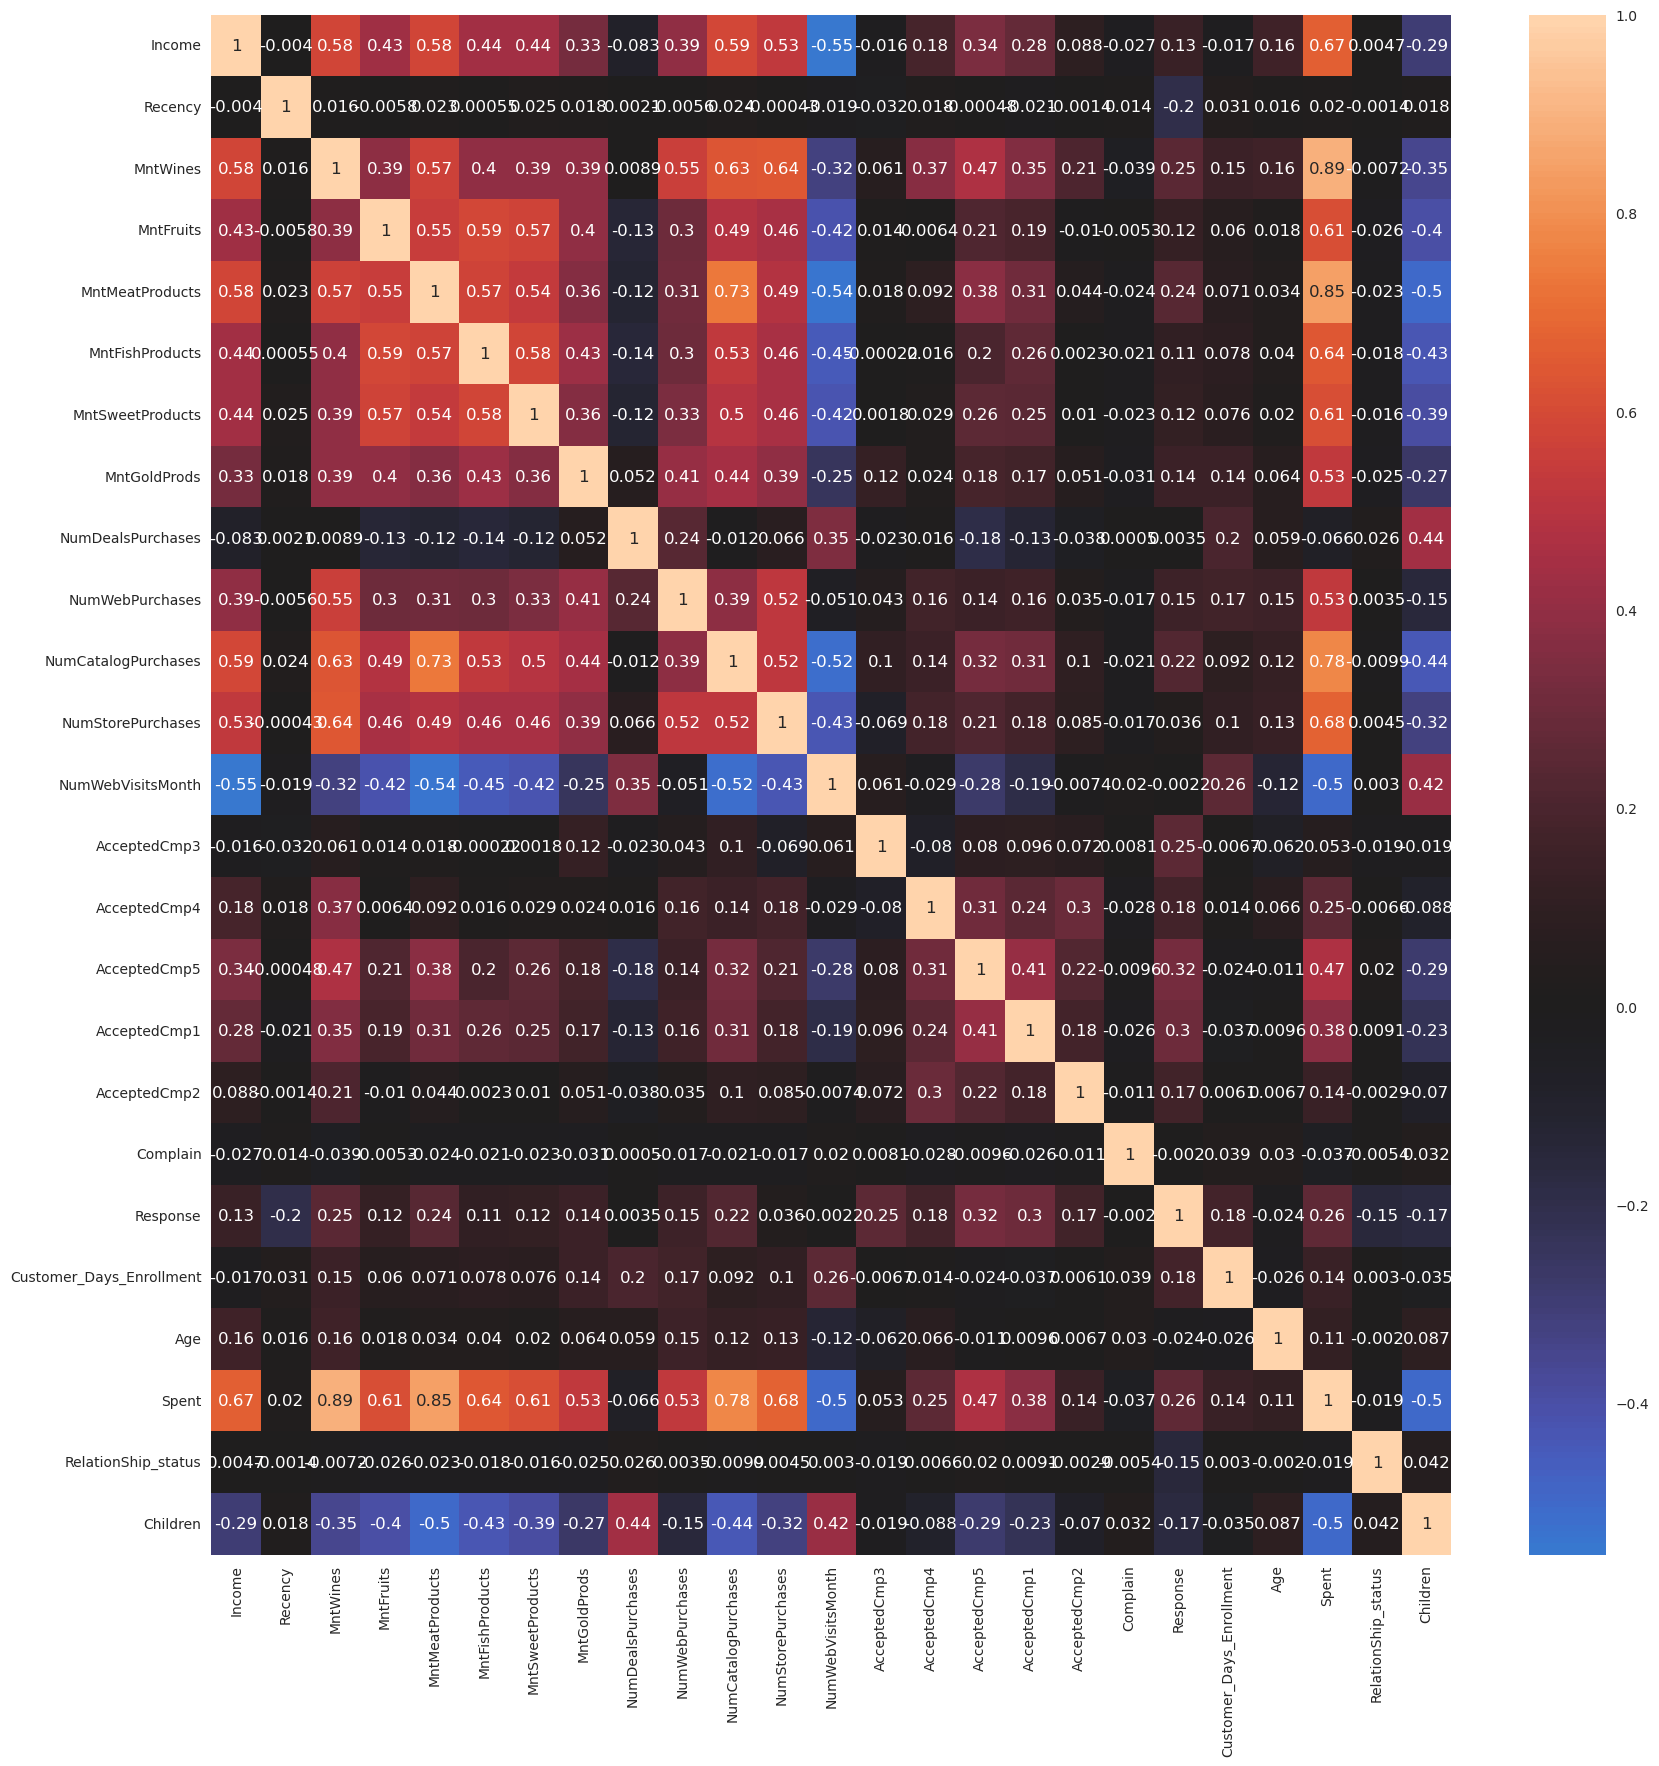

In [30]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

In [31]:
#defining numerical columns in data:
numeric_columns=data.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Customer_Days_Enrollment', 'Age', 'Spent',
       'RelationShip_status', 'Children'],
      dtype='object')

In [36]:
#defining categorical columns in data:
cat_columns=data.select_dtypes(['object']).columns
cat_columns

Index(['Education'], dtype='object')

In [37]:
# Importing the required preprocessing libraries:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

scaling the nuemerical columns

In [38]:
#standardscaler for numerical columns
scaler = StandardScaler()
scaler.fit(data[numeric_columns])

data_num = pd.DataFrame(scaler.transform(data[numeric_columns]), columns=numeric_columns)

one hot encoding for categorical columns

In [41]:
#ohe = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', drop = "first")
ohe.fit(data[cat_columns])

columns_ohe = list(ohe.get_feature_names_out(cat_columns))

In [42]:
data_cat = ohe.transform(data[cat_columns])

In [43]:
data_cat = pd.DataFrame(data_cat.todense(), columns=columns_ohe)

In [44]:
df = pd.concat([data_num, data_cat], axis=1)

In [45]:
df.head(4)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp2,Complain,Response,Customer_Days_Enrollment,Age,Spent,RelationShip_status,Children,Education_Postgraduate,Education_Undergraduate
0,0.234063,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,...,-0.117148,-0.097812,2.377952,1.974875,0.986443,1.675488,-1.348829,-1.264803,0.0,0.0
1,-0.234559,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,...,-0.117148,-0.097812,-0.420530,-1.665141,1.236801,-0.962358,-1.348829,1.405806,0.0,0.0
2,0.769478,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,...,-0.117148,-0.097812,-0.420530,-0.172132,0.318822,0.280250,0.741384,-1.264803,0.0,0.0
3,-1.017239,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,...,-0.117148,-0.097812,-0.420530,-1.923298,-1.266777,-0.919224,0.741384,0.070501,0.0,0.0


In [48]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,2.212430e-16,2.712837,-5.193627,-2.425850,-0.837566,2.175569,8.448532
col2,2216.0,6.733483e-17,1.406414,-3.559583,-0.931766,-0.218183,0.727198,6.228998
col3,2216.0,2.404815e-17,1.357918,-4.984304,-0.827544,0.022172,0.664456,7.817047


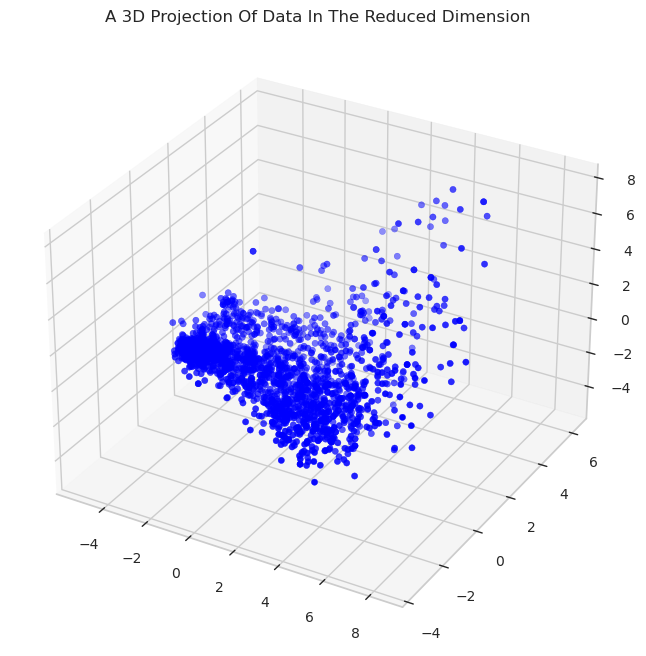

In [49]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


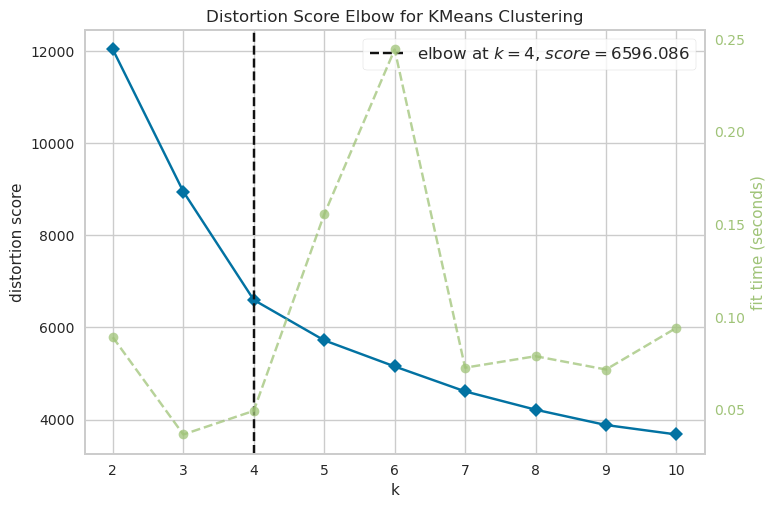

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

**optimal k is 4**

# K- means clustering

In [ ]:
from sklearn.cluster import *
kmeans = KMeans(n_clusters=4)
yhat_kmeans = kmeans.fit_predict(PCA_ds)
PCA_ds["KmeanClusters"] = yhat_kmeans
df["KmeanClusters"]= yhat_kmeans

In [51]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state = 0)

In [52]:
# we need a label for each datapoint relative to their clusters (will be split into 4 clusters and each will be labelled 0-3)
y = kmeans.fit_predict(PCA_ds)

In [53]:
PCA_ds["KmeanClusters"] = y
df["KmeanClusters"]= y

In [60]:
print(PCA_ds.head(5))

       col1      col2      col3  KmeanClusters
0  4.275584  0.950913 -1.297072              1
1 -2.652682 -0.824598  0.565356              0
2  1.612042 -0.805982 -0.828895              1
3 -2.581986 -1.197683  0.890034              0
4 -0.391334 -0.289803 -0.967982              2


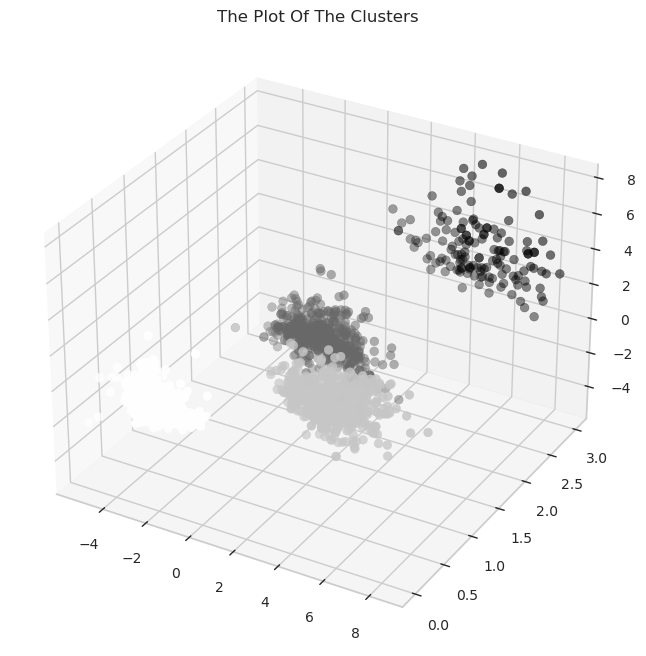

In [66]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="blue")
ax.scatter(x, y, z, s=40, c=PCA_ds["KmeanClusters"])
ax.set_title("The Plot Of The Clusters")
plt.show()

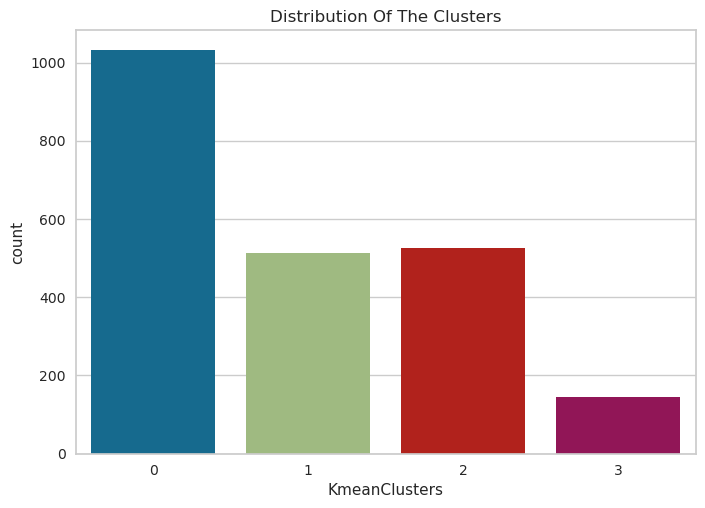

In [67]:
plot = sns.countplot(x=df["KmeanClusters"])
plot.set_title("Distribution Of The Clusters")
plt.show()